In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
WRITE_PATH = Path('C:\\', 'Temp', 'Screening_Result')
SAVE_FIGURE = [True, Path('C:\\', 'Temp', 'Screening_Figures')]

In [3]:
screen1 = pd.read_csv(Path(WRITE_PATH,'2019','11','07','chemical','results', 'all_results.csv')) # full screen
screen1 = screen1.replace([np.inf, -np.inf], np.nan)
fit_noerrors1 = screen1[screen1['error']==0] # <<<<<<< the data that passed all fitting hurdles!
fit_hasdarkframe1 = screen1[screen1['error']==8]  # <<<<<<< the data that was corrected for "dark frame", but otherwise passed all hurdles!
errorfree_data1 = pd.concat([fit_noerrors1,fit_hasdarkframe1])  # <<<<<<< We only look at the errorfree data!

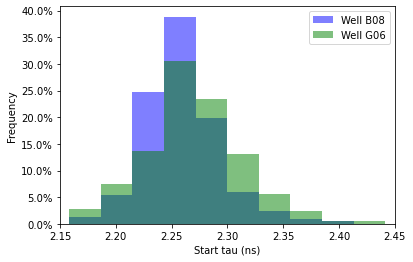

In [4]:
fig = plt.figure()
title = 'Fig_S2'
data = errorfree_data1[errorfree_data1['well_ID']=='B08']['start tau(ns)']
data1 = errorfree_data1[errorfree_data1['well_ID']=='G06']['start tau(ns)']
plt.hist([data, data1], bins=10, weights=[np.ones(len(data))/len(data),np.ones(len(data1))/len(data1)], color=['green','blue'], alpha=0.5, histtype='stepfilled')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Start tau (ns)')
plt.ylabel('Frequency')
plt.xlim(2.15,2.45)
plt.legend(["Well B08","Well G06"])
plt.show()
fig.savefig(Path(SAVE_FIGURE[1], title+'.svg'),dpi=600)